# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
import requests


In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# URL of the Mars Temperature Data Site
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
response = requests.get(url)

# Create a Beautiful Soup object
soup = BeautifulSoup(response.text, 'html.parser')



In [5]:
# Find all rows of data in the table
rows = soup.find_all('tr')

print("Number of rows found:", len(rows))



Number of rows found: 1868


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list to store rows of data
data_rows = []

# Loop through the scraped data to create a list of rows
for row in rows:
    # Extract text from each cell in the row
    cells = row.find_all('td')
    row_data = [cell.text.strip() for cell in cells]
    
    # Append the row data to the list of rows
    data_rows.append(row_data)

# Print the first few rows to check
display(data_rows[:5])  # Print the first 5 rows as an example



[[],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']]

In [7]:
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

df = pd.DataFrame(data_rows, columns=column_names)

display(df.head())  # Display the first few rows of the DataFrame


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,None,None,None,None,None,None,None
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [8]:
# Examine data type of each column
print(df.dtypes)


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [9]:
# Convert columns to the appropriate data types
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = pd.to_numeric(df['sol'], errors='coerce').fillna(-1).astype(int)
df['ls'] = pd.to_numeric(df['ls'], errors='coerce').fillna(-1).astype(int)
df['month'] = pd.to_numeric(df['month'], errors='coerce').fillna(-1).astype(int)
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce')

# Display the DataFrame
display(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [10]:
# 1. How many months are there on Mars?
df_filtered = df[df['month'].astype(str).str.isdigit()]
df_filtered.loc[:, 'month'] = df_filtered['month'].astype(int)

month_counts = df_filtered['month'].value_counts().sort_index()

print(month_counts)


month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [11]:
# 2. How many Martian days' worth of data are there?
df_filtered_sol = df[df['sol'] != -1]

num_sols_filtered = df_filtered_sol['sol'].nunique()

print("Number of Martian days:", num_sols_filtered)


Number of Martian days: 1867


In [12]:
# 3. What is the average low temperature by month?
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()

print("Average low temperature by month:")
print(average_low_temp_by_month)

Average low temperature by month:
month
-1           NaN
 1    -77.160920
 2    -79.932584
 3    -83.307292
 4    -82.747423
 5    -79.308725
 6    -75.299320
 7    -72.281690
 8    -68.382979
 9    -69.171642
 10   -71.982143
 11   -71.985507
 12   -74.451807
Name: min_temp, dtype: float64


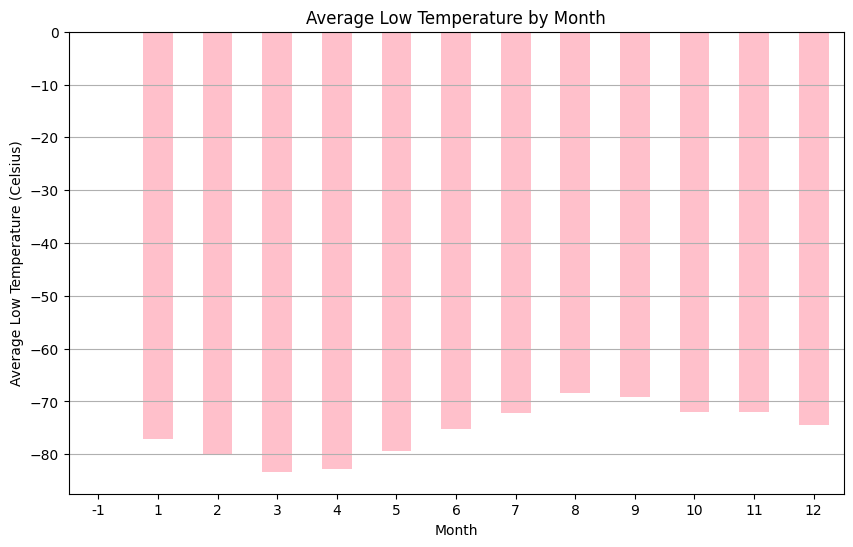

In [13]:
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()

# Plot the average temperature by month
plt.figure(figsize=(10, 6))
average_low_temp_by_month.plot(kind='bar', color='pink')
plt.title('Average Low Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (Celsius)')
plt.xticks(rotation=0)  
plt.grid(axis='y') 
plt.show()


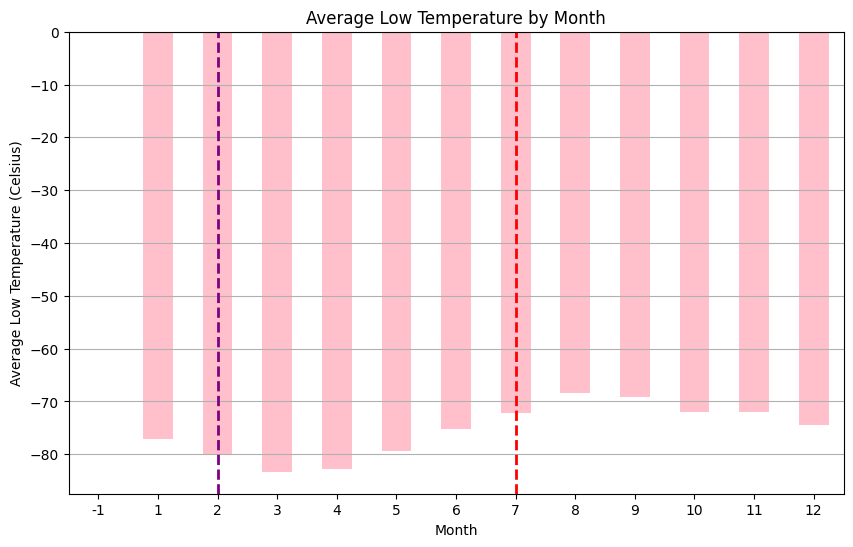

In [14]:
# Identify the coldest and hottest months in Curiosity's location
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()

coldest_month = average_low_temp_by_month.idxmin()
hottest_month = average_low_temp_by_month.idxmax()

plt.figure(figsize=(10, 6))
average_low_temp_by_month.plot(kind='bar', color='pink')
plt.title('Average Low Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (Celsius)')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.axvline(x=coldest_month - 1, color='purple', linestyle='--', linewidth=2)
plt.axvline(x=hottest_month - 1, color='red', linestyle='--', linewidth=2)

plt.show()


In [15]:
# 4. Average pressure by Martian month
average_pressure_by_month = df.groupby('month')['pressure'].mean()

print("Average pressure by Martian month:")
print(average_pressure_by_month)

Average pressure by Martian month:
month
-1            NaN
 1     862.488506
 2     889.455056
 3     877.322917
 4     806.329897
 5     748.557047
 6     745.054422
 7     795.105634
 8     873.829787
 9     913.305970
 10    887.312500
 11    857.014493
 12    842.156627
Name: pressure, dtype: float64


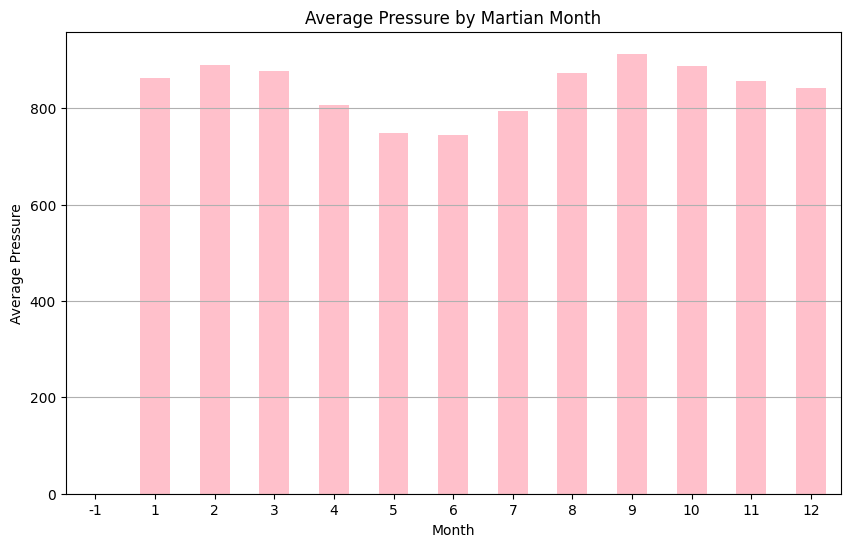

In [16]:
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Plot the average pressure by month
plt.figure(figsize=(10, 6))
average_pressure_by_month.plot(kind='bar', color='pink')
plt.title('Average Pressure by Martian Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()


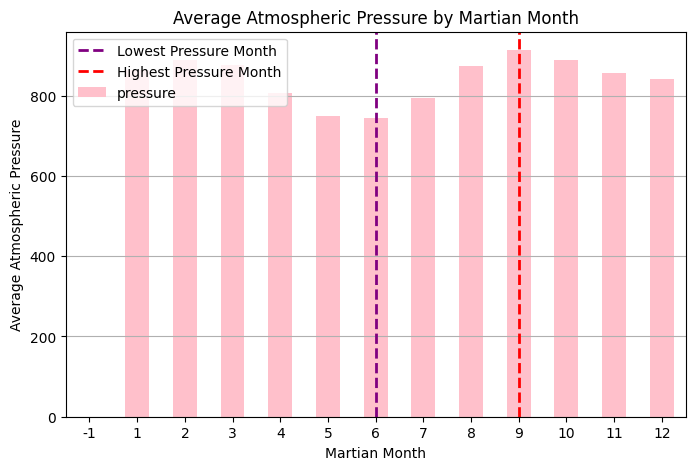

In [17]:
average_pressure_by_month = df.groupby('month')['pressure'].mean()
lowest_pressure_month = average_pressure_by_month.idxmin()
highest_pressure_month = average_pressure_by_month.idxmax()

plt.figure(figsize=(8, 5))
average_pressure_by_month.plot(kind='bar', color='pink')
plt.title('Average Atmospheric Pressure by Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Atmospheric Pressure')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.axvline(x=lowest_pressure_month, color='purple', linestyle='--', linewidth=2, label='Lowest Pressure Month')
plt.axvline(x=highest_pressure_month, color='red', linestyle='--', linewidth=2, label='Highest Pressure Month')

plt.legend()
plt.show()


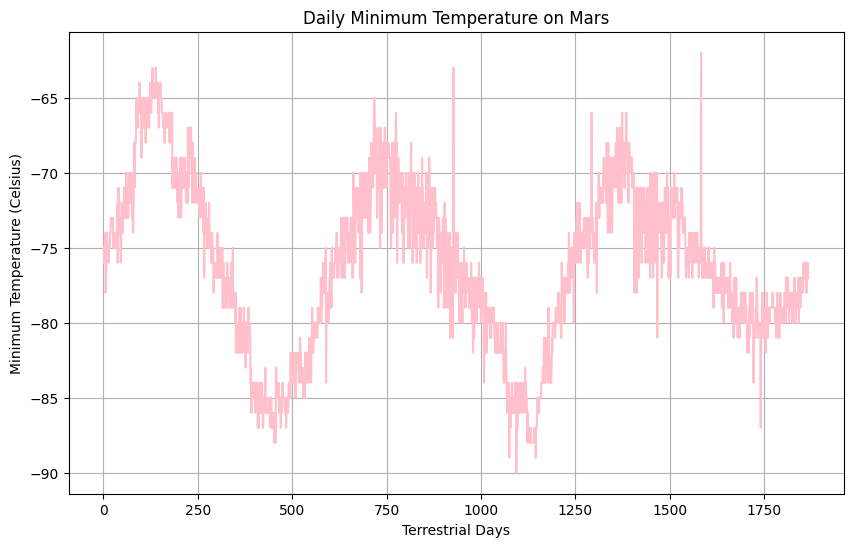

Number of terrestrial days in a Martian year: 119.97843665768193


In [18]:
import matplotlib.pyplot as plt

time_elapsed_between_months = df.groupby('month')['terrestrial_date'].diff().dt.days
average_time_elapsed = time_elapsed_between_months.mean()
num_martian_months = df['month'].nunique()
terrestrial_days_in_martian_year = average_time_elapsed * num_martian_months

plt.figure(figsize=(10, 6))
plt.plot(range(len(df)), df['min_temp'], color='pink')
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Terrestrial Days')
plt.ylabel('Minimum Temperature (Celsius)')
plt.grid(True)
plt.show()

print("Number of terrestrial days in a Martian year:", terrestrial_days_in_martian_year)


On average, the second month has the coldest minimum temperature on Mars, and the seventh month is the warmest. However, for humans it is still far too cold.



Atmospheric pressure is typically the lowest on the sixth month and highest on the ninth. This is pretty close to the times when temperatures are that their coldest and warmest respectively.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [19]:
# Write the data to a CSV
df.to_csv('mars_weather_data.csv', index=False)


In [20]:
browser.quit()